<a href="https://colab.research.google.com/github/Luc1lfer/DeepLearning/blob/main/Exercise6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 6

In [1]:
import tensorflow as tf
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
import numpy as np
import pandas as pd

path = "https://github.com/robitussin/CCDEPLRL_EXERCISES/blob/9b8ac1c5683abecc144f0af47eb7cda0688e12b7/dataset/reviews.json?raw=true"

dataset = pd.read_json(path)

In [3]:
dataset.sample(10)

,review,rating
165,ok packaging is good..,4
218,The item was not C-type. I ordered usb to c- t...,1
857,It s very small - I am normal a medium and I c...,1
176,mali naman nadeliver. Dapat black and violet k...,4
953,salamat po sa courier pero Yung items po nakak...,1
315,"For some reasons, both vga cables are not conn...",1
208,Magandaaaaa and mabilis din naman magcharge so...,5
872,mali Yung binigay na size large inorder ko per...,1
551,i did not recieve the item please i want to re...,1
336,"Great Product, although may kaunting dent/dama...",4


In [4]:
print(dataset['rating'].value_counts())

rating
1    299
5    249
4    249
3    123
2     81
Name: count, dtype: int64


## 1. Tokenize the data

In [5]:

review = dataset['review'].tolist()
rating = dataset['rating'].tolist()

training_size = int(len(review) * 0.8)

training_review = review[0:training_size]
testing_review = review[training_size:]
training_rating = rating[0:training_size]
testing_rating = rating[training_size:]

def map_rating_to_sentiment(rating_list):
    return [1 if int(r) > 3 else 0 for r in rating_list]

training_sentiment = map_rating_to_sentiment(training_rating)
testing_sentiment = map_rating_to_sentiment(testing_rating)

training_rating_final = np.array(training_sentiment)
testing_rating_final = np.array(testing_sentiment)

In [6]:
vocab_size = 1500
embedding_dim = 16
max_length = 22
trunc_type = 'post'
padding_type = 'post'
oov_tok = ""

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_review)

word_index = tokenizer.word_index

## 2. Sequence the data

In [7]:
training_sequences = tokenizer.texts_to_sequences(training_review)
testing_sequences = tokenizer.texts_to_sequences(testing_review)

## 3. Pad the data

In [8]:
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)


## 4. Train a sentiment model


In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.build(input_shape=(None, max_length)) # force build
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 22, 16)         │        24,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 16)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 6)              │           102 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,109 (94.18 KB)

 Trainable params: 24,109 (94.18 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
num_epochs = 40
history = model.fit(training_padded, training_rating_final, epochs=num_epochs, validation_data=(testing_padded, testing_rating_final))


Epoch 1/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.5466 - loss: 0.6917 - val_accuracy: 0.2139 - val_loss: 0.7157
Epoch 2/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5699 - loss: 0.6794 - val_accuracy: 0.2139 - val_loss: 0.7431
Epoch 3/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6017 - loss: 0.6596 - val_accuracy: 0.2139 - val_loss: 0.7583
Epoch 4/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5835 - loss: 0.6501 - val_accuracy: 0.2090 - val_loss: 0.7568
Epoch 5/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6356 - loss: 0.6220 - val_accuracy: 0.2388 - val_loss: 0.7673
Epoch 6/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6708 - loss: 0.5968 - val_accuracy: 0.3483 - val_loss: 0.7577
Epoch 7/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7650 - loss: 0.5548 - val_accuracy: 0.4129 - val_loss: 0.7606
Epoch 8/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7815 - loss: 0.5303 - val_accuracy: 0.4925 - val_loss

In [12]:
# Predict and evaluate
predictions_prob = model.predict(testing_padded)
predictions = np.argmax(predictions_prob, axis=1)


predictions = (predictions_prob > 0.5).astype(int)

num_classes = 2

print(classification_report(testing_rating_final, predictions, target_names=[f"Class {i}" for i in range(num_classes)]))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
              precision    recall  f1-score   support

     Class 0       0.93      0.70      0.80       158
     Class 1       0.42      0.79      0.55        43

    accuracy                           0.72       201
   macro avg       0.67      0.75      0.67       201
weighted avg       0.82      0.72      0.75       201



## Get files for visualing the network

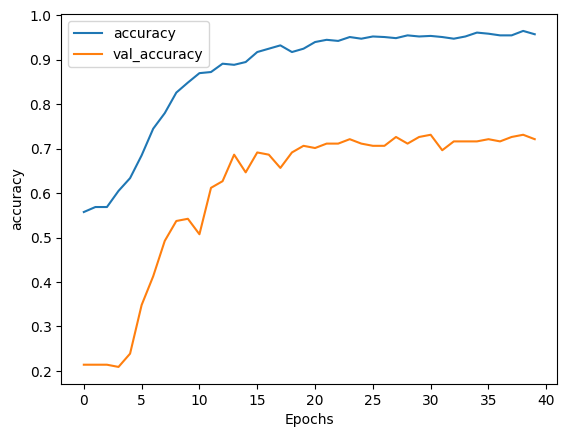

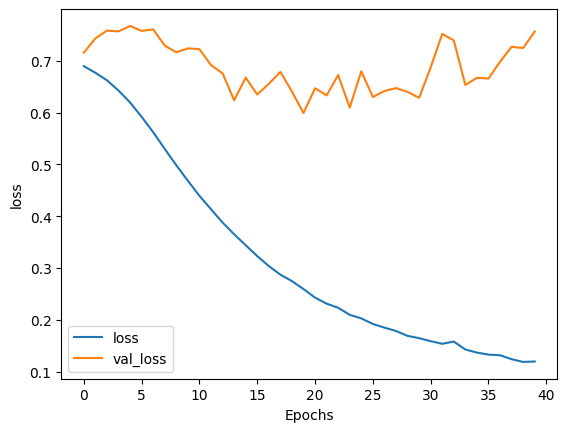

In [13]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [14]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)

(1500, 16)


In [15]:

print("Number of embeddings:", len(weights))
print("Number of words in metadata:", len(word_index))


Number of embeddings: 1500
Number of words in metadata: 3131


## 5. Predict sentiment with new reviews

In [16]:
fake_reviews = ['I love this phone', 'I hate spaghetti',
                'Everything was cold',
                'Everything was hot exactly as I wanted',
                'Everything was green',
                'the host seated us immediately',
                'they gave us free chocolate cake',
                'not sure about the wilted flowers on the table',
                'only works when I stand on tippy toes',
                'does not work when I stand on my head',
                'panget ka',
                'maganda ka']

print(fake_reviews)

padding_type='post'
sample_sequences = tokenizer.texts_to_sequences(fake_reviews)
fakes_padded = pad_sequences(sample_sequences, padding=padding_type, maxlen=max_length)

print('\nHOT OFF THE PRESS! HERE ARE SOME NEWLY MINTED, ABSOLUTELY GENUINE REVIEWS!\n')

classes = model.predict(fakes_padded)

for x in range(len(fake_reviews)):
  print(fake_reviews[x])
  print(classes[x])
  print('\n')


['I love this phone', 'I hate spaghetti', 'Everything was cold', 'Everything was hot exactly as I wanted', 'Everything was green', 'the host seated us immediately', 'they gave us free chocolate cake', 'not sure about the wilted flowers on the table', 'only works when I stand on tippy toes', 'does not work when I stand on my head', 'panget ka', 'maganda ka']

HOT OFF THE PRESS! HERE ARE SOME NEWLY MINTED, ABSOLUTELY GENUINE REVIEWS!

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
I love this phone
[0.8295551]


I hate spaghetti
[0.37429675]


Everything was cold
[0.39809665]


Everything was hot exactly as I wanted
[0.5986231]


Everything was green
[0.37780926]


the host seated us immediately
[0.6094519]


they gave us free chocolate cake
[0.40321976]


not sure about the wilted flowers on the table
[0.10244348]


only works when I stand on tippy toes
[0.8357798]


does not work when I stand on my head
[0.17813961]


panget ka
[0.42316717]


maganda ka
[0.86943907]


